# Question 5 practical

In [19]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import networkx as nx

## question 17 
from respective theorical question we concluded every cell of adjacency matrix is a bernouli random variable with p and all vetrice are binomial random varibale 

to initialize graph , we only need to fill matrix elements with result of bernouli rv

In [4]:
def init_graph(n , p):
    g = [[0 for col in range(n)] for row in range(n)]
    for row in range(n):
        for col in range(n):
            if (col>row):
                g[row][col] = scipy.stats.bernoulli.rvs(p, loc=0 ,size=1 , random_state=None)[0]
            elif (col<row):
                g[row][col] = g[col][row]   # symmetric attribute of matrix
    return g

let's count number of vertice in adjacency matrix of graph g

In [5]:
def cnt_adjacencies (g):
    return (np.array(g)).sum() / 2

now let's apply above function N times

In [4]:
def sapply_N (N , n , p):
    mean = 0
    for i in range (N):
        graph = init_graph(n, p)
        cnt = cnt_adjacencies(graph)
        print(cnt)
        mean += cnt
    print(mean/N)

sapply_N (10 , 1000 , 0.0034)   

1677.0
1708.0
1686.0
1736.0
1700.0
1719.0
1764.0
1705.0
1677.0
1640.0
1701.2


#### from theorical question 23 we expected comb(n,2) * p which is 1698.3 for n=1000 and p=0.0034 and the final line of above code shows average counted is 1701.2 which is really close to expected value of 1698.3 (In fact it is in 95% trust interval of expected value)
 
but the above results show that average calculated value of vertice is really lower than m

## question 18
we will report average number of same colors using the definition of being from the same color

then apply it to N graph initiated using init_graph

In [6]:
def cnt_adjacents_of_vertex (g , v_index):
    return (np.array(g)[v_index]).sum()

def cnt_same_colors (g , p , n):
    L = (n-1)*p
    out = 0
    for i in range(n):
        if (cnt_adjacents_of_vertex(g, i) > L):
            out += 1
    return out


In [13]:
def sapply_N_q18(N , n , p):
    mean = 0
    for i in range (N):
        graph = init_graph(n, p)
        cnt = cnt_same_colors(graph , p , n)
        print(cnt)
        mean += cnt
    print(mean/N)

sapply_N_q18(10 , 100 , 0.0016)

19
16
18
14
22
15
16
16
13
16
16.5


to overcome time consuming problem, we used n=100 and p=0.0016 as input parameters

# question 19
we need to implement the definition of Transitive and chained. then we apply it N=5 times to a random graph created with init_graph and report average values

In [14]:
def cnt_transitive_and_chained(g , n):
    transitive = chained = 0
    for row in range(n):
        for col in range(row+1 , n):
            val_to_add = 0
            for s in range (n):
                if (g[row][s]==1 & g[row][s] == g[col][s] & (s!=row & s!=col)):
                    val_to_add = 1 
            if g[row][col] == 1:
                transitive += val_to_add
            else:
                chained += val_to_add
    return transitive,chained

    the above function returns number of transitive and chained in order of n^3.
    transitives are the main logic , if it is not transitve , then it must be chained    
    we usually expect less transitve relations according to result of 29th and 30th theorical questions
    the results below will show that better

In [15]:
def sapply_N_q19(N , n , p):
    mean_chained = mean_transitive = 0
    for i in range (N):
        graph = init_graph(n, p)
        cnt1 , cnt2 = cnt_transitive_and_chained(graph, n)
        mean_transitive += cnt1
        mean_chained += cnt2
    print("mean_transitive : " , mean_transitive/N)
    print("mean_chained : " , mean_chained/N)

sapply_N_q19(5, 100 , 0.01)

mean_transitive :  46.2
mean_chained :  4903.8


## question 20
let's consider a cluster with size of n=1000, we are going to find expected value of adjacent of adjacents of vertex in graph. first let's find number of adjacents of adjacents of a vertex using adjacency matrix of g

In [20]:
def cnt_adjacents_of_adjacents_vertex (g , n , v_index):
    out = 0
    row = np.array(g)[v_index,:]
    for i in range(n):
        if (row[i]==1): 
            out += cnt_adjacents_of_vertex(g, i)
            # out -= 1    # adjacency with v_index is better not to be counted
    return out   

not let us calculate average and report it to see if it is close to expected value of 

In [ ]:
def sapply_N_q20 (N , n , p):
    avg = 0
    for i in range(N):
        g = init_graph(n,p) 
        for j in range(n):
            avg += cnt_adjacents_of_adjacents_vertex(g, n , j)
        avg = avg / 2   # counted twice
        print(avg / (2*n))    
    retrun avg

sapply_N_q20(1, 1000 , 0.003)

from theorical question 31, we expected the average number of adjacencies of adjacents will approximatly 62312
the above code also produced a very close number to that which is acceptable

## Question 21
networkx package includes very usefull functions for such graphs. one of them is 
[average_shortest_path_length(G, weight=None, method=None)](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html#networkx.algorithms.shortest_paths.generic.average_shortest_path_length). 
we are going to implement this function

**as defined by networkx developers , we have to be sure that graph is connected if not strongly connected. we would also implement this condition to reach a better and more reliable answear. also we should consider the fact that by reducing p and n , the chance of final graph being connected will be significantly small. to avoid such, we use a larger p and to avoid time consuming problem , some smaller n**

In [27]:
def cnt_avg_dist_in_graph (g , n):
    avg = 0
    for i in range(n):
        for j in range(n):
            if (i==j):
                continue
            avg += nx.shortest_path_length(g,i,j)
    return (avg / (n*(n-1)))

# the algorithm is here :
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html#networkx.algorithms.shortest_paths.generic.average_shortest_path_length

3.585858585858586


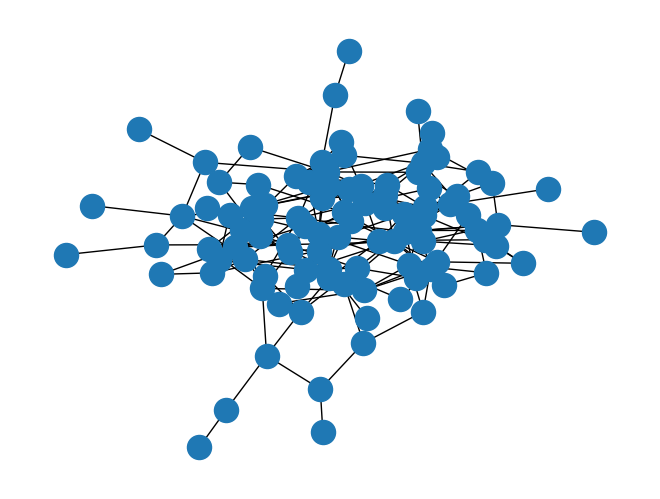

In [29]:
def sapply_N_q21(N , n , p):
    for i in range(N):
        g = nx.binomial_graph(n , p)
        while (nx.is_connected(g) != 1):
            g = nx.binomial_graph(n , p) # using init_graph is possible 
                                         # but one problem is converting g to networks graph
                                         # networkx.convert_matrix.from_numpy_matrix is suggested by developers 
                                         # but it seems it is either deprecated or not available in normal packages !
        # reached a connected graph of g
        print(cnt_avg_dist_in_graph(g, n))
        nx.draw(g)
        plt.draw()
        plt.show()

# n=100 and p = 0.033 are used instead of n=1000 and p=0.0033 to reach a connected graph of g much faster
sapply_N_q21(1 , 100 , 0.033)
             

## Question 22 
finding vertice i and j with maximum distance is simple. then we itearate on N and report average value:


In [13]:
def longest_path_length(g , n):
    longest_path = 0
    for i in range(n):
        for j in range(n):
            if (i==j):
                continue
            longest_path = max(nx.shortest_path_length(g,i,j) , longest_path)
    return longest_path

In [18]:
def sapply_N_q22(N , n , p):
    avg = 0
    for i in range(N):
        g = nx.binomial_graph(n,p)
        while (nx.is_connected(g) != 1):
            g = nx.binomial_graph(n,p)
        avg += longest_path_length(g,n)
    print(avg / N)
    return (avg / N)

sapply_N_q22(100, 50 , 0.34)        

2.83


2.83

## Question 23
simply iterate from 10 to 200 with steps 10 and apply the question 22 function

3.69
3.1
3.0
2.98
2.82
2.56
2.27
2.1
2.11
2.01
2.02
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


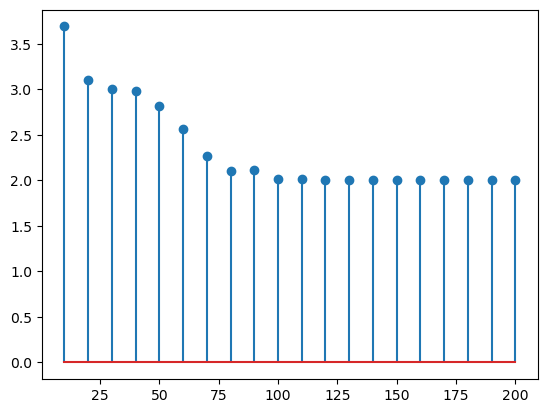

In [19]:
pair = []
longest_path = []
for n in range (10 , 201 , 10):
    pair.append(n)
    longest_path.append(sapply_N_q22(100, n, 0.34))

plt.stem(pair , longest_path)
plt.draw()
plt.show()

* stem diagram is decreasing and converging to 2.0 which means by increasing size of cluster , every two indivisuals will know eachother by at least 2 relatives

## Question 24
a triangle adjacency is very similar to transitivity in graph. in fact we used this triangles in theorical practice 31 to calculate expeted value of transitive relations in graph. there is one subtle problem here, input matrix of sapply_N_q20 was a simple numpy array or simple python array but here it should be networksx graph. as seen in above codes, converting adjacency matrixes could be helpful to reduce code redundancy. but it seems networkx convert functions are not that reliable so let's rewrite the code of question 20 for networkx graph again:

In [1]:
# question 20 function rewritten for graphs not using convert instructions
def cnt_relation_triangles_graph (g , n):
    out = 0
    for i in range(n):
        for j in range(i+1 , n):
            if (g.has_edge(i,j)==0):
                continue
            for k in range (j+1 , n):
                if (g.has_edge(i,j)==g.has_edge(j,k) & g.has_edge(j,k)==g.has_edge(i,k)):
                    out += 1
    return out

In [13]:
def sapply_N_q24(N, n, p):
    avg = 0
    for i in range(N):
        g = nx.binomial_graph(n , p)
        while (nx.is_connected(g) != 1):
            g = nx.binomial_graph(n , p)
        avg += cnt_relation_triangles_graph(g, n)
    print(avg/N)

sapply_N_q24(100 , 100 , 0.34)

6414.22


the result is very similar to result of doing same operation using question 20 function

## Question 25
p is a function n, using the code above, we write another sapply function for it

**out machine is not powerfull enough to calculate for n>=60 properly so we used the almighty [google collab](https://colab.research.google.com/) to plot the data. the plot created is as below :**

In [18]:
# please note the plot below is a result of runnig this cell but not on our machine

def sapply_q25():
    x = []
    y = []
    for n in range (10 , 51 , 10):
        x.append(n)
        y.append(sapply_N_q24(1, n, 60/(n**2)))
    plt.stem(x,y)
    plt.draw()
    plt.show()
sapply_q25()


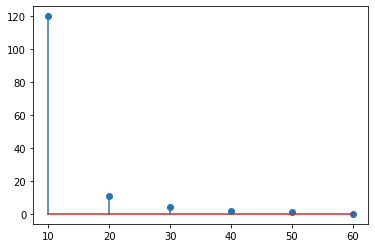

the result of above code shows that average number of triangle relations (transitivity) is converging to 0. normally, we expect by increasing number of vertice, the average of triangles also increases; however p is decreasing much faster than n increases. the fact that p growth order is of n^(-2) and growth rate of n is linear, creates a decreasing average number of triangles.

## Question 26
this time, p is constant. by increasing the number of vertice, we expect to see more average number of triangles. let's run this code below and check it:

9.0
46.0
176.0
381.0
696.0
1249.0
1943.0
3436.0
4661.0
6158.0


TypeError: '<=' not supported between instances of 'NoneType' and 'NoneType'

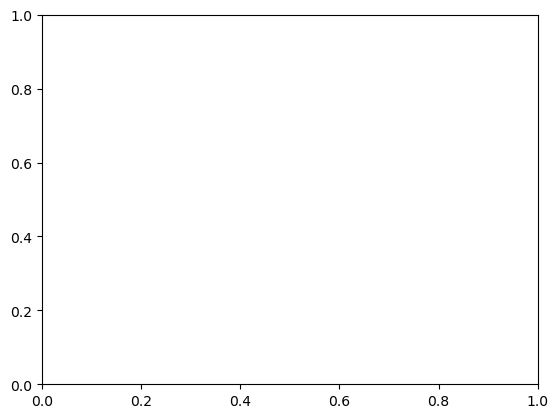

In [20]:
def sapply_q26(p):
    x = []
    y = []
    for n in range (10 , 101 , 10):
        x.append(n)
        y.append(sapply_N_q24(1, n, p))
    plt.stem(x,y)
    plt.draw()
    plt.show()

sapply_q26(0.34)

the above plot approves our expectations. the average number of triangles in increasing

## Question 27
predicting behaviour of average triangles is not that simple here. neither growth rate of n is larger nor growth rate of p so best way to understand is ploting the result.
**but before that, increasing the value of p to 49/n wouldn't change behaviour of output but it will significantly help to reduce the time needed to calculate, so we used p=49/p ! we used google collab for this plot too**

In [22]:
def sapply_q27():
    x = []
    y = []
    for n in range (50 , 1201 , 50):
        x.append(n)
        y.append(sapply_N_q24(1, n, 49/n))
    plt.stem(x,y)
    plt.draw()
    plt.show()

sapply_q27()

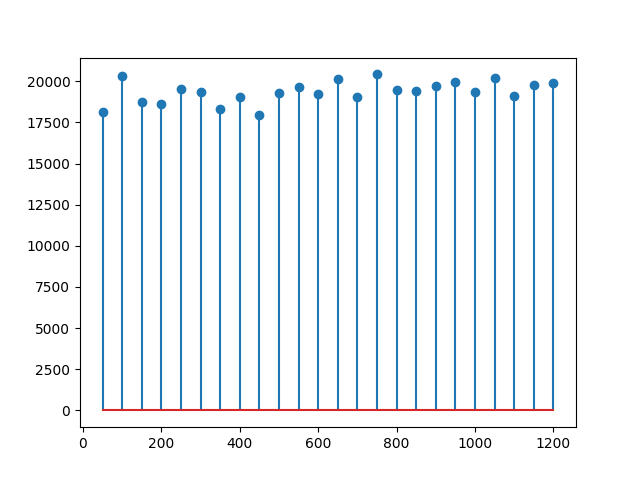

the plot above is not that helpfull! it is neither increasing nor decreasing. the above plot can remind us discrete uniform distribution.let's plot CDF to see if can help us or not.


*we know CDF will be increasing, this comes from the definiton of CDF. all we want to observe is some abnormality in plot or some jumps*

In [24]:
def sapply_q27_cdf():
    x = []
    y = []
    cnt = 0
    for n in range (50 , 1201 , 50):
        x.append(n)
        cnt += sapply_N_q24(1, n, 49/n)
        y.append(cnt)
    plt.stem(x,y)
    plt.draw()
    plt.show()

sapply_q27_cdf()

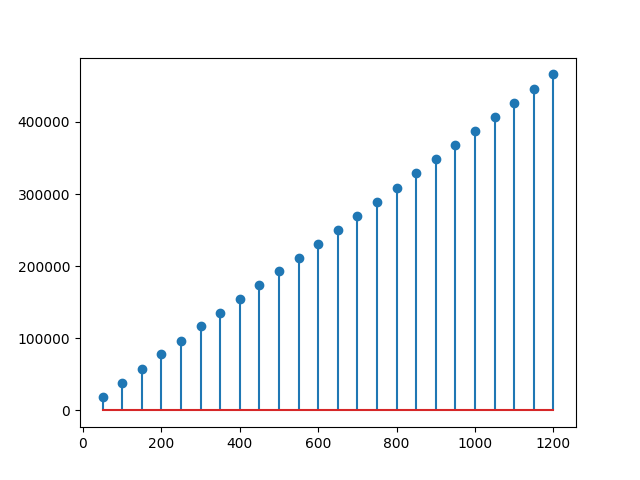

something very strange has happend! CDF created is very similar to CDF of normal distribution. the same pattern will be seen for even larger n values. it seems that above values actually follow uniform distribution